# Feature Selection

Having many features lead to the __Curse of Dimensionality__. So, we reduce the complexity.

<img src='Data/Reducing Complexity.png' width=500/>

__<font color=red>Feature Selection</font>__ - Technique of choosing a subset of __most relevant features__ from original features.
- In __Filter methods__, we use the __statistical tests__ pick the most relevant features.
  - Statistical Tests could be Variance Thresholding, Chi-Square Test, ANOVA, Mutual Information
- In __Wrapper methods__, we use several subsets of features to build models and we pick the __best subset__. It lies between filter and embedded methods. Examples are __Forward and Backward stepwise regression__. __Each candidate__ model will have a __different subset__ of features. But all candidates will use __same model__ (for example decision trees). The __way features are selected can vary across wrapper methods__ - features may be __added or dropped__ to see if the __model improves__.
- In __Embedded methods__, we build models which __assign importance to individual features__ based which we can select features. So, the important features are embedded in models that is why they are named like that. Also note that only some models (like __decision trees, lasso regression__) have this ability not all models.

__<font color=red>Dimensionality Reduction</font>__ - Technique of reducing __complex dimensions__ to __lesser complex lower__ dimensions.
- Projection - Find new, better axes and re-orient data.
  - Examples, 
    - Principal Component Analysis (PCA), 
    - Factor Analysis, 
    - Linear Discriminant Analysis(LDA), 
    - Quadratic Discriminant Analysis(QDA)

- Manifold Learning - Unroll the data so that twists and turns are smoothened out to go down to lower dimensionality. Works best when data lies along a rolled up surface such as Swiss roll or S-curve
  - Examples,
    - Multi-dimensional Scaling (MDS),
    - Isomap
    - LLEmbedding,
    - Kernel PCA

- Autoencoding - Works with neural networks to simplify the data. It builds significant features in the data. They extract efficient representations(lower dimensions) of complex data.

__Drawbacks of Reducing Complexity__
- Loss of Information
- Performance degradation
- Computationally intensive
- Complex pipelines
- Transformed features hard to interpret

<font color=red>Q. Which procedure to follow (Feature Selection, Wrapper or Embedded method)?</font>

__Solution__:
 
- __Filter method__:
  - Filter type methods select variables regardless of the model. They are based only on general features like the __correlation__ with the variable to predict. Filter methods suppress the least interesting variables. The other variables will be part of a classification or a regression model used to classify or to predict data. 
  - Steps:
    - <u>Retain strongly correlated variables with target</u>: As a first step, we discard features having 'correlation less than a threshold value' with the 'target' variable 
    - <u>Discard strongly correlated variables among themselves</u>: As a second step, we discard features having 'correlation more than threshold value with other feature variables'(not target).
  - These methods are particularly effective in computation time and robust to overfitting. In general, we apply this technique if there are several features (features > 20). Then we can apply either Wrapper or Embedded methods for further selection of features.
<img src='Data/FS By Filter method.png'/>

- __Wrapper method__:
  - Wrapper methods evaluate subsets of variables which allows, unlike filter approaches, to detect the possible interactions between variables. The two main disadvantages of these methods are:
   - The increasing overfitting risk when the number of observations is insufficient.
   - The significant computation time when the number of variables is large.
<img src='Data/FS By Wrapper method.png'/>

- __Embedded method__:
  - Embedded methods have been recently proposed that try to combine the advantages of both previous methods. A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification simultaneously, such as the FRMT algorithm.
  
<img src='Data/FS By Embedded method.png'/>

__Visualizing Feature Correlations__

I had to install __yellowbrick__ which is an extension of __scikit-learn API__ with __Visual Analysis and Diagnostic tools__.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('Data/diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


1) Correlation using <font color=red>Pandas</font>
- Numeric computation by __corr__
- Viewing by __heatmap__

In [3]:
# Let us use pandas corr to view the 'Numeric correlations'

diabetes_corr = diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


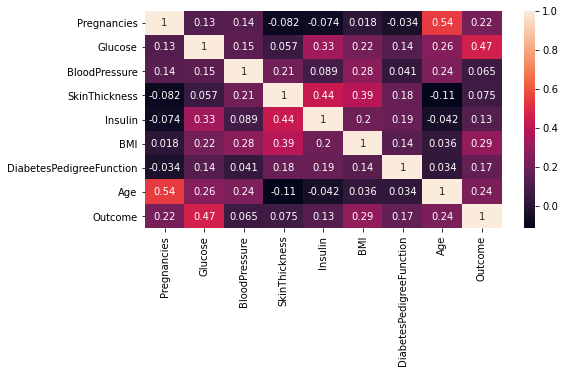

In [4]:
# Let us use the heatmap to view the 'Visual correlations'

plt.figure(figsize=(8,4))
sns.heatmap(diabetes_corr, annot=True)

2) Correlation using <font color=red>Yellowbrick</font> 
- Numeric values by __FeatureCorrelation__ 
- viewing by __Poof__

In [5]:
# Let us now view the correlations using the 'Yellowbrick' library
# We view the correlations between 'Age' vs 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'

X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = diabetes['Age']

In [6]:
feature_names = X.columns
feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

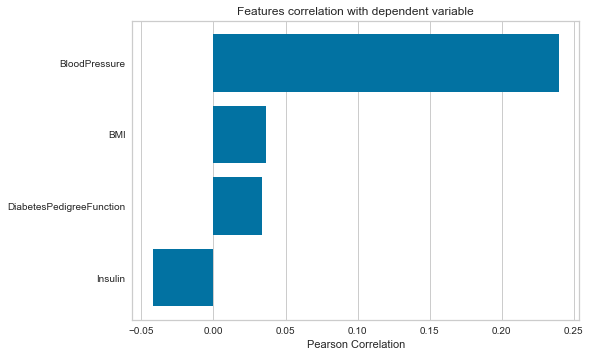

In [7]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson', sort=True)
visualizer.fit(X, Y)
visualizer.poof()

In [8]:
# Features participating in the correlation

visualizer.features_

array(['Insulin', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure'],
      dtype=object)

In [9]:
# Numerical correlation values

visualizer.scores_

array([-0.04216295,  0.03356131,  0.03624187,  0.23952795])

- +1 is total positive correlation
- -1 is total negative correlation
-  0 is no correlation


Note: 
- __Correlation doesn't imply Causation__
- __Correlations are very sensitive to outliers__

In [10]:
# We can view the features vs correlation values

corr_df = pd.DataFrame({'Feature Names':visualizer.features_, 'Correlation Values':visualizer.scores_})
corr_df

,Feature Names,Correlation Values
0,Insulin,-0.042163
1,DiabetesPedigreeFunction,0.033561
2,BMI,0.036242
3,BloodPressure,0.239528


In [11]:
# Let us repeat the above exercise for all the features vs label
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']

In [12]:
feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

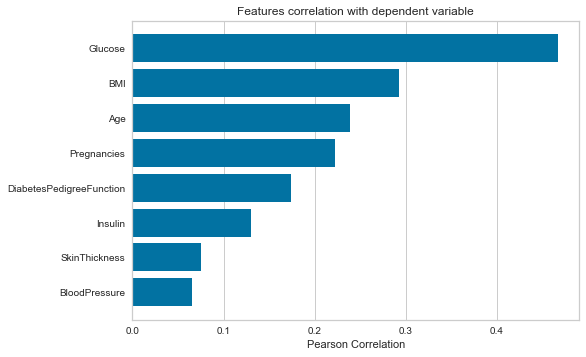

In [13]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson', sort=True)
visualizer.fit(X, Y)
visualizer.poof()

NOTE: The correlation values are meaningful only to <font color=red>Continuous numeric</font> variables including <font color=red>dichotomous</font> variables.

<font color=red>Dichotomous variables</font> are those having two discrete values.

3) Correlation using <font color=red>Mutual Information</font>
- To calculate correlation using __Mutual Information__ method, we should specify the __values__ of discrete variables because the procedure for calculation varies between continuous and discrete variables.

In [14]:
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
181,0,119,64,18,92,34.9,0.725,23,0
708,9,164,78,0,0,32.8,0.148,45,1
686,3,130,64,0,0,23.1,0.314,22,0
519,6,129,90,7,326,19.6,0.582,60,0
190,3,111,62,0,0,22.6,0.142,21,0


Notice that Pregnancies is a disrete variable

<bound method Visualizer.poof of FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000224B1D3A9B0>,
                   color=None, feature_index=None, feature_names=None,
                   labels=Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'),
                   method='mutual_info-classification', sort=True)>

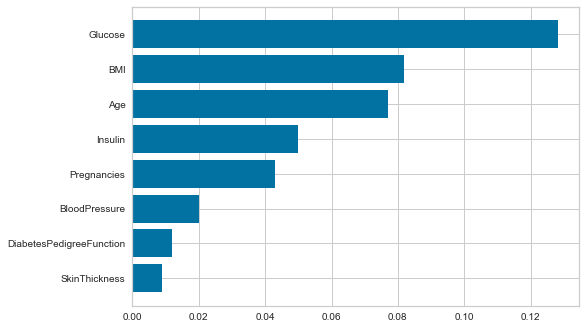

In [15]:
# Specify which features are discrete

discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True

visualizer = FeatureCorrelation(method='mutual_info-classification', labels=feature_names, sort=True)
visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)
visualizer.poof

Correlation method <font color=red>mutual_info-classification</font> measures dependency between two variables.
- Equal to 0 when the variables are __independent__
- Non-zero otherwise

<bound method Visualizer.poof of FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000224B250A550>,
                   color=None, feature_index=[7, 5, 4, 2, 1],
                   feature_names=['Age', 'BMI', 'Insulin', 'BloodPressure',
                                  'Glucose'],
                   labels=None, method='mutual_info-classification', sort=True)>

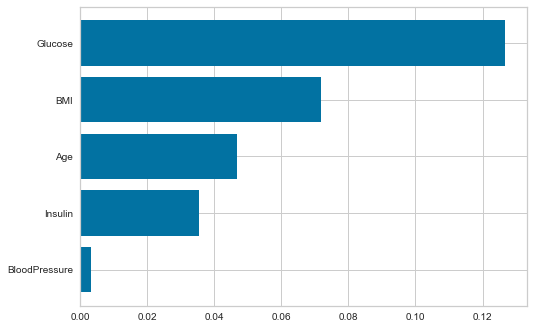

In [16]:
# We can calculate correlations for all variables but can view only selected variables

features_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

visualizer = FeatureCorrelation(method='mutual_info-classification', feature_names=features_to_plot, sort=True)
visualizer.fit(X, Y,  random_state=0)
visualizer.poof